In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix

In [101]:
#load dataset
train_data = pd.read_csv('amazon.csv')
train_data.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'category',
       'discounted_price', 'actual_price', 'discount_percentage', 'rating',
       'rating_count', 'about_product', 'user_id', 'user_name', 'review_id',
       'review_title', 'review_content', 'img_link', 'product_link',
       'interaction_type'],
      dtype='object')

In [103]:
train_data.head()

,Unnamed: 0,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,interaction_type
0,0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,921,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,click
1,1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4,"43,994","Compatible with all Type C enabled devices, be...",760,"ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,purchase
2,2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,254,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,purchase
3,3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,899,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,purchase
4,4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,968,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,rating


In [105]:
train_data.shape

(1465, 18)

In [107]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1465 non-null   int64 
 1   product_id           1465 non-null   object
 2   product_name         1465 non-null   object
 3   category             1465 non-null   object
 4   discounted_price     1465 non-null   object
 5   actual_price         1465 non-null   object
 6   discount_percentage  1465 non-null   object
 7   rating               1465 non-null   object
 8   rating_count         1463 non-null   object
 9   about_product        1465 non-null   object
 10  user_id              1465 non-null   int64 
 11  user_name            1465 non-null   object
 12  review_id            1465 non-null   object
 13  review_title         1465 non-null   object
 14  review_content       1465 non-null   object
 15  img_link             1465 non-null   object
 16  produc

In [109]:
train_data.isnull().sum()

Unnamed: 0             0
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
interaction_type       0
dtype: int64

In [111]:
train_data.duplicated().sum()

0

In [133]:
train_data['Name'].value_counts()

Name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                            5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                     4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)                                   3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                                               3
Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)    3


In [115]:
train_data['actual_price'] = train_data['actual_price'].astype(str).apply(lambda x: x.replace('₹', '').replace(',', '')).astype("float")
train_data['discounted_price'] = train_data['discounted_price'].astype(str).apply(lambda x: x.replace('₹', '').replace(',', '')).astype("float")
train_data['discount_percentage'] = train_data['discount_percentage'].astype(str).apply(lambda x: x.replace("%", "")).astype(int)

In [117]:
# Attempt to convert 'Rating' to numeric, forcing errors to NaN
train_data['rating'] = pd.to_numeric(train_data['rating'], errors='coerce')

# Identify rows where the conversion failed (i.e., non-numeric entries in 'Rating')
invalid_ratings = train_data[train_data['rating'].isna()]

# Print or display the rows with problematic 'Rating' values
print("Rows with non-numeric 'Rating' values:")
print(invalid_ratings[['rating']])

Rows with non-numeric 'Rating' values:
      rating
1279     NaN


In [119]:
train_data.isnull().sum()

Unnamed: 0             0
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
interaction_type       0
dtype: int64

In [121]:
train_data.dropna(inplace =True)

In [123]:
train_data['rating_count'] = train_data['rating_count'].astype("str").apply(lambda x: x.replace(",", "")).astype("int")

In [125]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1462 non-null   int64  
 1   product_id           1462 non-null   object 
 2   product_name         1462 non-null   object 
 3   category             1462 non-null   object 
 4   discounted_price     1462 non-null   float64
 5   actual_price         1462 non-null   float64
 6   discount_percentage  1462 non-null   int32  
 7   rating               1462 non-null   float64
 8   rating_count         1462 non-null   int32  
 9   about_product        1462 non-null   object 
 10  user_id              1462 non-null   int64  
 11  user_name            1462 non-null   object 
 12  review_id            1462 non-null   object 
 13  review_title         1462 non-null   object 
 14  review_content       1462 non-null   object 
 15  img_link             1462 non-null   object

In [127]:
train_data.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'category',
       'discounted_price', 'actual_price', 'discount_percentage', 'rating',
       'rating_count', 'about_product', 'user_id', 'user_name', 'review_id',
       'review_title', 'review_content', 'img_link', 'product_link',
       'interaction_type'],
      dtype='object')

In [129]:
train_data = train_data[['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'img_link','interaction_type']]

In [131]:
column_name_mapping = {
    'user_id': 'ID', 
    'product_id':'ProductID', 
    'rating':'Rating', 
    'rating_count': 'Rating_Count',
    'category': 'Category',  
    'product_name':'Name',
    'img_link':'ImageURL', 
    'about_product':'Description',
    'interaction_type':'Interaction'
}

train_data.rename(columns=column_name_mapping,inplace=True)

train_data.columns

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22120\3920926185.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.rename(columns=column_name_mapping,inplace=True)


Index(['ProductID', 'Name', 'Category', 'discounted_price', 'actual_price',
       'discount_percentage', 'Rating', 'Rating_Count', 'Description', 'ID',
       'ImageURL', 'Interaction'],
      dtype='object')

In [139]:
train_data.head()

,ProductID,Name,Category,discounted_price,actual_price,discount_percentage,Rating,Rating_Count,Description,ID,ImageURL,Interaction
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,921,https://m.media-amazon.com/images/W/WEBP_40237...,click
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994,"Compatible with all Type C enabled devices, be...",760,https://m.media-amazon.com/images/W/WEBP_40237...,purchase
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,254,https://m.media-amazon.com/images/W/WEBP_40237...,purchase
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,899,https://m.media-amazon.com/images/I/41V5FtEWPk...,purchase
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,968,https://m.media-amazon.com/images/W/WEBP_40237...,rating


In [141]:
num_users = train_data['ID'].nunique()
num_items = train_data['ProductID'].nunique()
num_ratings = train_data['Rating'].nunique()
print(f"Number of unique users:{num_users}")
print(f"Number of unique items:{num_items}")
print(f"Number of unique ratings:{num_ratings}")

Number of unique users:761
Number of unique items:1348
Number of unique ratings:25


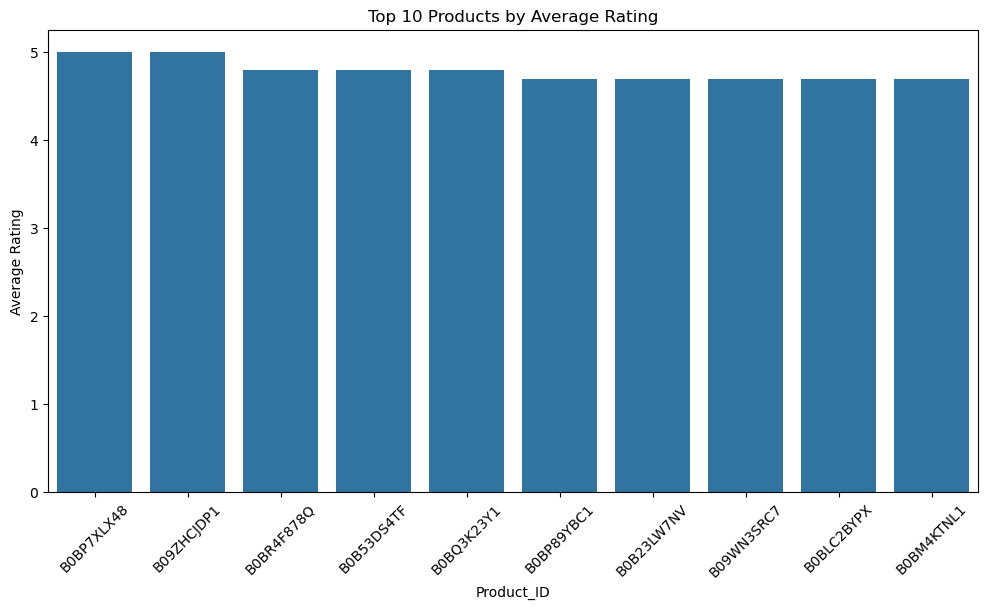

In [143]:
# Calculate average ratings by ProductID
average_ratings = train_data.groupby('ProductID').agg({'Rating': 'mean', 'Rating_Count': 'sum'}).reset_index()

# Bar plot of average ratings
plt.figure(figsize=(12, 6))
sns.barplot(x='ProductID', y='Rating', data=average_ratings.sort_values(by='Rating', ascending=False).head(10))
plt.title('Top 10 Products by Average Rating')
plt.xlabel('Product_ID')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


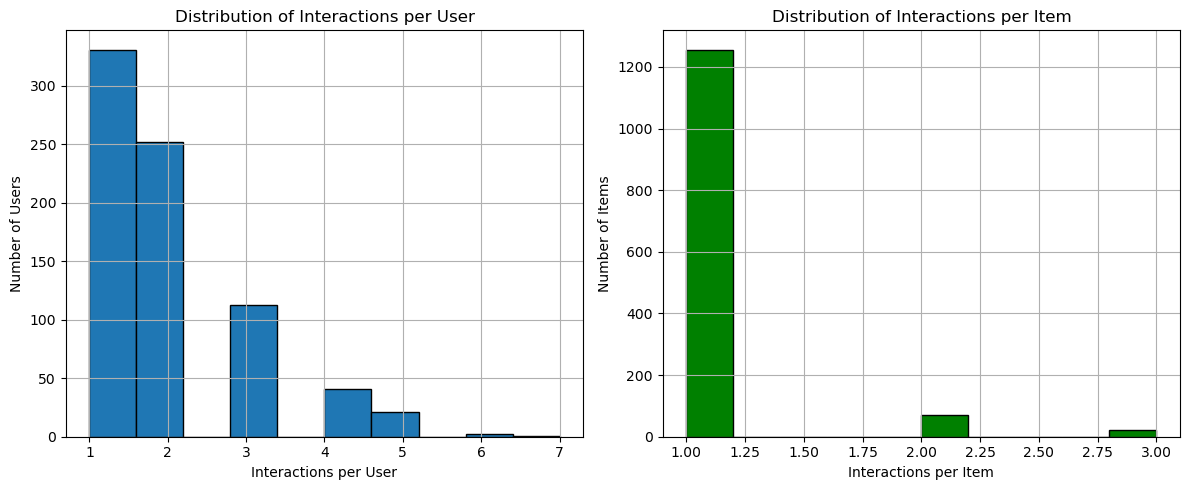

In [145]:

# Distribution of interactions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
train_data['ProductID'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most Popular Items')

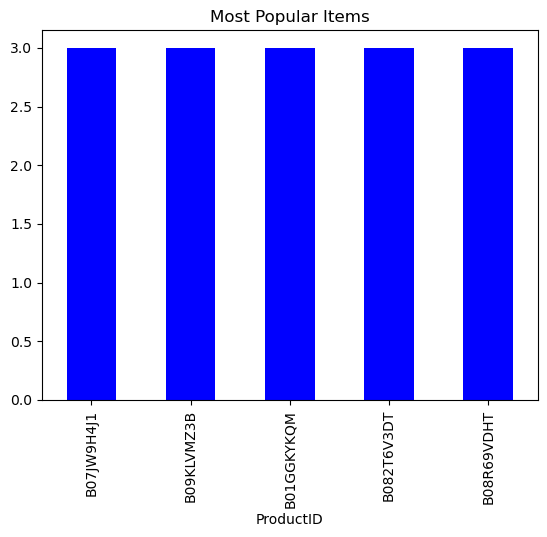

In [147]:
popular_items = train_data['ProductID'].value_counts().head(5)
popular_items.plot(kind='bar',color='blue')
plt.title("Most Popular Items")

<Axes: xlabel='Rating'>

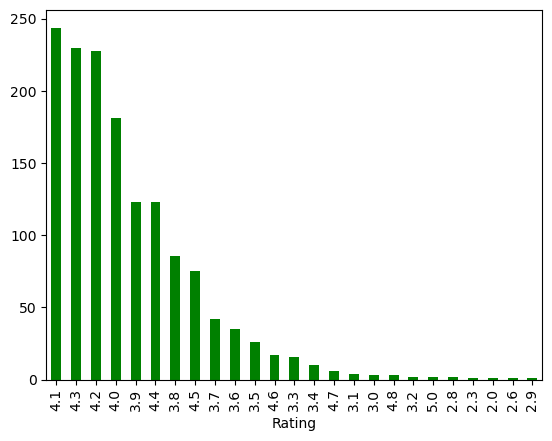

In [149]:
train_data['Rating'].value_counts().plot(kind='bar',color='green')

In [40]:
!pip install spacy


In [43]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 465.5 kB/s eta 0:00:28
     --------------------------------------- 0.1/12.8 MB 508.4 kB/s eta 0:00:26
     --------------------------------------- 0.1/12.8 MB 544.7 kB/s eta 0:00:24
     --------------------------------------- 0.1/12.8 MB 607.9 kB/s eta 0:00:21
     --------------------------------------- 0.1/12.8 MB 607.9 kB/s eta 0:00:21
      -------------------------------------- 0.2/12.8 MB 654.3 kB/s eta 0:00:20
      -------------------------------------- 0.3/12.8 MB 655.4 kB/s eta 0:00:20
      -------------------------------------- 0.3/12.8 MB 655.4 kB/s eta 0:00:20
      -------------------------------------- 0.3/12.8 MB 631.5 kB/s eta 0:00:20
     - ------------------------------------- 0.3/12.8 MB 655.4 k

Popularity base recommendation system

In [151]:
def recommend_popular_products(train_data, top_n=12):
    # Sort by rating count and average rating to get the most popular products
    popular_products = train_data.sort_values(by=['Rating_Count', 'Rating'], ascending=[False, False])
    return popular_products[['Name', 'Rating', 'Rating_Count','ImageURL','actual_price','discounted_price']].head(top_n)

In [153]:
popular_products = recommend_popular_products(train_data)

In [155]:
popular_products

,Name,Rating,Rating_Count,ImageURL,actual_price,discounted_price
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,4.4,426973,https://m.media-amazon.com/images/I/41nPYaWA+M...,700.0,219.0
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",4.4,426973,https://m.media-amazon.com/images/I/41bCxnHksn...,475.0,309.0
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",4.4,426973,https://m.media-amazon.com/images/I/41eJqkFjCR...,1400.0,309.0
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,4.4,426972,https://m.media-amazon.com/images/I/41nPYaWA+M...,700.0,219.0
352,boAt Bassheads 100 in Ear Wired Earphones with...,4.1,363713,https://m.media-amazon.com/images/I/31J6I7SrLX...,999.0,349.0
400,boAt Bassheads 100 in Ear Wired Earphones with...,4.1,363713,https://m.media-amazon.com/images/I/31qVddHyy5...,999.0,379.0
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,4.1,363711,https://m.media-amazon.com/images/I/31IdiM9ZM8...,999.0,365.0
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",4.1,313836,https://m.media-amazon.com/images/I/416SpYgTVY...,10999.0,8499.0
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",4.1,313836,https://m.media-amazon.com/images/I/41i7LM0pGw...,8499.0,6499.0
473,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",4.1,313832,https://m.media-amazon.com/images/I/41P4Al+S3z...,7999.0,6499.0


In [770]:
popular_products.to_csv('popular_products.csv')

Content based recommendation system

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [159]:
def get_similar_product_details(train_data, item_name):   
    
    # Calculate cosine similarity based on the 'tags' column (product features)
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(train_data['Name'])
    
    item_vector = tfidf_vectorizer.transform([item_name])

    cosine_sim = cosine_similarity(item_vector,tfidf_matrix)
    
    # Get a list of similar items (including the target item)
    similar_items = list(enumerate(cosine_sim[0]))
    
    # Sort the items by similarity score in descending order and exclude the first item (itself)
    similar_items_sorted = sorted(similar_items, key=lambda x: x[1], reverse=True)[1:16]

    # Get the indices of the similar items
    similar_items_indexed = [i[0] for i in similar_items_sorted]
    
    # Extract the details of the similar products
    similar_items_data = train_data.iloc[similar_items_indexed][['Name','Rating','Description','ImageURL','Rating_Count']]
    

    return similar_items_data


In [161]:
item_name = 'sandwich'
content_based_rec = get_similar_product_details(train_data, item_name)

content_based_rec

,Name,Rating,Description,ImageURL,Rating_Count
1400,Borosil Prime Grill Sandwich Maker (Grey),4.0,Non stick grilling plate can make up to 2 larg...,https://m.media-amazon.com/images/W/WEBP_40237...,2377
1072,"Prestige Sandwich Maker PGMFD 01, Black",4.2,"New designs, Durable die cast aluminum grill p...",https://m.media-amazon.com/images/I/41LFdROYIC...,40106
1464,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,4.3,"Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...",https://m.media-amazon.com/images/W/WEBP_40237...,6987
1316,Cello Non-Stick Aluminium Sandwich Gas Toaster...,4.0,"Material - Pure Grade Aluminum, Colour - Black...",https://m.media-amazon.com/images/W/WEBP_40237...,314
1189,Tosaa T2STSR Sandwich Gas Toaster Regular (Black),3.9,Consumes Lower Gas|Even Distribution Of Heat|C...,https://m.media-amazon.com/images/I/31PzyH4N9x...,13127
1402,Prestige PSMFB 800 Watt Sandwich Toaster with ...,4.2,Content: Prestige sandwich toaster with fixed ...,https://m.media-amazon.com/images/I/4108k4zDdO...,5967
1284,iBELL SM1301 3-in-1 Sandwich Maker with Detach...,4.3,MULTIPURPOSE: Different Sandwich Plates for To...,https://m.media-amazon.com/images/I/41iHB-nmy8...,562
1324,iBELL SM1515NEW Sandwich Maker with Floating H...,4.1,Sandwich / Panini Maker with Thermostatically ...,https://m.media-amazon.com/images/I/51SvK5l5JR...,1045
1280,KENT 16025 Sandwich Grill 700W | Non-Toxic Cer...,4.1,"Compact and sleek looking modern appliance, KE...",https://m.media-amazon.com/images/W/WEBP_40237...,4716
1255,Wipro Vesta Grill 1000 Watt Sandwich Maker |Du...,4.1,Truly multifunctional Grill Sandwich Maker whi...,https://m.media-amazon.com/images/I/31nbqS8FhK...,282


In [163]:
item_name = 'samsung phone'
content_based_rec = get_similar_product_details(train_data, item_name)

content_based_rec

,Name,Rating,Description,ImageURL,Rating_Count
404,STRIFF PS2_01 Multi Angle Mobile/Tablet Tablet...,4.3,"[PORTABLE SIZE]- 98mm*96mm*19mm, STRIFF desk p...",https://m.media-amazon.com/images/I/31iE517+NF...,42641
48,7SEVEN® Compatible for Samsung Smart 4K Ultra ...,3.6,1. 7SEVEN Compatible remote suitable for all O...,https://m.media-amazon.com/images/W/WEBP_40237...,493
527,"Sounce 360 Adjustable Mobile Phone Holder, Uni...",4.1,【PERFECT FOR ANY PLACES】: Perfect for watching...,https://m.media-amazon.com/images/I/41bFp+Wev+...,1475
488,Elv Mobile Phone Mount Tabletop Holder for Pho...,4.3,Metal Phone Stand for Mobile Phones and Tablet...,https://m.media-amazon.com/images/I/318Pgjl1wq...,2351
640,DIGITEK® (DTR 260 GT) Gorilla Tripod/Mini 33 c...,3.9,Heavy Duty: The Gorillapod mobile tripod is ma...,https://m.media-amazon.com/images/W/WEBP_40237...,21372
225,Remote Compatible for Samsung LED/LCD Remote C...,3.7,"Soft & Durable Keypad|Durable Quality, Rigid B...",https://m.media-amazon.com/images/W/WEBP_40237...,246
165,LOHAYA Television Remote Compatible with Samsu...,3.9,Compatible Device For Samsung Smart LED/LCD/HD...,https://m.media-amazon.com/images/I/31vPhcWqqW...,1193
414,"Nokia 105 Single SIM, Keypad Mobile Phone with...",4.0,All-new redesigned Nokia mobile which is famil...,https://m.media-amazon.com/images/I/41w5fk8Vl6...,128311
33,Samsung Original Type C to C Cable - 3.28 Feet...,4.3,USB Type-C to Type-C cable with universal comp...,https://m.media-amazon.com/images/W/WEBP_40237...,355
833,Samsung Original Type C to C Cable - 3.28 Feet...,4.3,USB Type-C to Type-C cable with universal comp...,https://m.media-amazon.com/images/I/11ICusapw3...,355


Collaborative filtering

In [202]:
train_data.head()

,ProductID,Name,Category,discounted_price,actual_price,discount_percentage,Rating,Rating_Count,Description,ID,ImageURL,Interaction
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,921,https://m.media-amazon.com/images/W/WEBP_40237...,NaN
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994,"Compatible with all Type C enabled devices, be...",760,https://m.media-amazon.com/images/W/WEBP_40237...,NaN
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,254,https://m.media-amazon.com/images/W/WEBP_40237...,NaN
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,899,https://m.media-amazon.com/images/I/41V5FtEWPk...,NaN
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,968,https://m.media-amazon.com/images/W/WEBP_40237...,NaN


In [179]:
train_data['Interaction'].value_counts()

Interaction
3    496
2    491
1    475
Name: count, dtype: int64

In [216]:
interaction_mapping = {'click': 1, 'purchase': 2, 'rating':3}
train_data['Interaction'] = train_data['Interaction'].map(interaction_mapping)

In [218]:
user_item_matrix = train_data.pivot_table(index='ID', columns='ProductID', values='Rating', aggfunc='mean').fillna(0)

In [220]:
interactions_matrix = train_data.pivot_table(index='ID', columns='ProductID', values='Interaction', aggfunc=lambda x: 1 if x.size > 0 else 0).fillna(0)

In [222]:
combined_matrix = user_item_matrix + interactions_matrix

In [224]:
user_similarity = cosine_similarity(combined_matrix)

In [226]:
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [228]:
user_similarities = user_similarity[target_user_index]
similar_user_indices = user_similarities.argsort()[::-1][1:]

In [230]:
recommend_items = []

for user_index in similar_user_indices:
    rated_by_similar_user = combined_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (combined_matrix.iloc[target_user_index]==0)
    
    recommend_items.extend(combined_matrix.columns[not_rated_by_target_user])

recommended_items_details = train_data[train_data['ProductID'].isin(recommend_items)][['Name','Rating_Count','Description','ImageURL','Rating']]


In [232]:
top_items = recommended_items_details.sort_values(by='Rating', ascending=False).head(15)

In [234]:
top_items

,Name,Rating_Count,Description,ImageURL,Rating
174,Syncwire LTG to USB Cable for Fast Charging Co...,5,This sturdy and durable cable made of tpe and ...,https://m.media-amazon.com/images/I/317OoQfs1g...,5.0
775,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,23,Reliable wireless connection up to 10m|Advance...,https://m.media-amazon.com/images/I/31+Rg6Z46d...,5.0
1145,Swiffer Instant Electric Water Heater Faucet T...,53803,✔Quick Electric Hot Water Tap Heating tube: hi...,https://m.media-amazon.com/images/I/41+t2HWvwF...,4.8
1299,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...",3964,VOLTAGE (230 Volts): Instant Vortex Air Fryer ...,https://m.media-amazon.com/images/W/WEBP_40237...,4.8
1201,"Oratech Coffee Frother electric, milk frother ...",28,-Make delicious milk foam creamer for your dri...,https://m.media-amazon.com/images/W/WEBP_40237...,4.8
459,Spigen EZ Fit Tempered Glass Screen Protector ...,7779,Compatibility ; Glass Screen Protector Compati...,https://m.media-amazon.com/images/I/51EiPNlJDg...,4.7
1388,Campfire Spring Chef Prolix Instant Portable W...,2591,Prolix Auto cut off feature: It is available w...,https://m.media-amazon.com/images/W/WEBP_40237...,4.7
1275,Multifunctional 2 in 1 Electric Egg Boiling St...,2300,Egg Frying Pan,https://m.media-amazon.com/images/W/WEBP_40237...,4.7
249,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,5935,Resolution: 4K Ultra HD (3840 x 2160) | Refres...,https://m.media-amazon.com/images/I/51uVckL1jR...,4.7
1226,Zuvexa USB Rechargeable Electric Foam Maker - ...,54,The food taste stainless steel whisking head i...,https://m.media-amazon.com/images/I/41714O1hnm...,4.7


In [236]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix = train_data.pivot_table(index='ID', columns='ProductID', values='Rating', aggfunc='mean').fillna(0)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)

    interactions_matrix = train_data.pivot_table(index='ID', columns='ProductID', values='Interaction', aggfunc=lambda x: 1 if x.size > 0 else 0).fillna(0)

    combined_matrix = user_item_matrix + interactions_matrix

    # Find the index of the target user in the matrix
    target_user_index = combined_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar users
    recommended_items = []

    for user_index in similar_users_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (combined_matrix.iloc[target_user_index] == 0)

        # Extract the item IDs of recommended items
        recommended_items.extend(combined_matrix.columns[not_rated_by_target_user][:top_n])

    # Get the details of recommended items
    recommended_items_details = train_data[train_data['ProductID'].isin(recommended_items)][['Name', 'Rating_Count','Description', 'ImageURL', 'Rating']]
    top_items = recommended_items_details.sort_values(by='Rating', ascending=False).head(15)

    return top_items

In [238]:
# Example usage
target_user_id = 921
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 5 recommendations for User 921:


,Name,Rating_Count,Description,ImageURL,Rating
734,"Logitech M235 Wireless Mouse, 1000 DPI Optical...",54405,You can surf the Web with more comfort and eas...,https://m.media-amazon.com/images/I/31CtVvtFt+...,4.5
970,Belkin Essential Series 4-Socket Surge Protect...,20668,Maximum Spike Current: 6500 Amps|Grounds AC po...,https://m.media-amazon.com/images/W/WEBP_40237...,4.5
239,Amazon Basics 16-Gauge Speaker Wire - 50 Feet,12091,50 Feet of 16-gauge speaker wire|Connects audi...,https://m.media-amazon.com/images/W/WEBP_40237...,4.4
588,SanDisk Cruzer Blade 32GB USB Flash Drive,253105,"Ultra-compact and portable USB flash drive,Cap...",https://m.media-amazon.com/images/I/310mw9KTJv...,4.3
721,Duracell Plus AAA Rechargeable Batteries (750 ...,27201,Duracell Rechargeable AAA 750mAh batteries sta...,https://m.media-amazon.com/images/I/418YrbHVLC...,4.3
724,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",31534,"A comfortable, ambidextrous shape feels good i...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,4.3
1181,Bajaj ATX 4 750-Watt Pop-up Toaster (White),9331,2 slice pop-up toaster|Variable browning setti...,https://m.media-amazon.com/images/W/WEBP_40237...,4.3
143,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,179692,150 Mbps Wi-Fi —— Exceptional wireless speed u...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,4.2
148,BlueRigger Digital Optical Audio Toslink Cable...,30023,Enables easy installation of audio components ...,https://m.media-amazon.com/images/I/41CF6GtnpK...,4.2
189,BlueRigger Digital Optical Audio Toslink Cable...,30023,Enables easy installation of audio components ...,https://m.media-amazon.com/images/W/WEBP_40237...,4.2


Hybrid Recommendations

In [241]:
# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)
def hybrid_recommendations(train_data,target_user_id, item_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = get_similar_product_details(train_data, item_name)

    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id)

    # Merge and deduplicate the recommendations
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()
    
    return hybrid_rec.head(10)

In [243]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 921 # Change this to the user_id you want recommendations for
item_name = "Sandwich"  # Change this to the item name
hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 921 and Item 'Sandwich':


,Name,Rating,Description,ImageURL,Rating_Count
1400,Borosil Prime Grill Sandwich Maker (Grey),4.0,Non stick grilling plate can make up to 2 larg...,https://m.media-amazon.com/images/W/WEBP_40237...,2377
1072,"Prestige Sandwich Maker PGMFD 01, Black",4.2,"New designs, Durable die cast aluminum grill p...",https://m.media-amazon.com/images/I/41LFdROYIC...,40106
1464,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,4.3,"Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...",https://m.media-amazon.com/images/W/WEBP_40237...,6987
1316,Cello Non-Stick Aluminium Sandwich Gas Toaster...,4.0,"Material - Pure Grade Aluminum, Colour - Black...",https://m.media-amazon.com/images/W/WEBP_40237...,314
1189,Tosaa T2STSR Sandwich Gas Toaster Regular (Black),3.9,Consumes Lower Gas|Even Distribution Of Heat|C...,https://m.media-amazon.com/images/I/31PzyH4N9x...,13127
1402,Prestige PSMFB 800 Watt Sandwich Toaster with ...,4.2,Content: Prestige sandwich toaster with fixed ...,https://m.media-amazon.com/images/I/4108k4zDdO...,5967
1284,iBELL SM1301 3-in-1 Sandwich Maker with Detach...,4.3,MULTIPURPOSE: Different Sandwich Plates for To...,https://m.media-amazon.com/images/I/41iHB-nmy8...,562
1324,iBELL SM1515NEW Sandwich Maker with Floating H...,4.1,Sandwich / Panini Maker with Thermostatically ...,https://m.media-amazon.com/images/I/51SvK5l5JR...,1045
1280,KENT 16025 Sandwich Grill 700W | Non-Toxic Cer...,4.1,"Compact and sleek looking modern appliance, KE...",https://m.media-amazon.com/images/W/WEBP_40237...,4716
1255,Wipro Vesta Grill 1000 Watt Sandwich Maker |Du...,4.1,Truly multifunctional Grill Sandwich Maker whi...,https://m.media-amazon.com/images/I/31nbqS8FhK...,282


In [244]:
# Function to calculate precision and recall
def precision_recall(user_recommended_items, user_relevant_items):
    # Convert lists to sets for easier comparison
    recommended_set = set(user_recommended_items)
    relevant_set = set(user_relevant_items)

    # Calculate true positives (relevant recommended items)
    true_positives = len(recommended_set.intersection(relevant_set))

    # Calculate precision and recall
    precision = true_positives / len(recommended_set) if len(recommended_set) > 0 else 0
    recall = true_positives / len(relevant_set) if len(relevant_set) > 0 else 0

    return precision, recall


In [245]:
# Example usage
user = 921  # The user for whom recommendations are being made
item_name = 'Sandwich maker'
# Define relevant items (the actual items the user interacted with, e.g., highly rated or purchased)
# Filter items that the user purchased (assuming there is a 'Purchased' or similar column)
user_relevant_items = train_data[(train_data['ID'] == user) & (train_data['Rating'] > 4)]['Name'].unique().tolist()


# Get the recommended items from the hybrid recommendation system
recommended_items = hybrid_recommendations(train_data,user, item_name, top_n=10)

# Calculate precision and recall
precision, recall = precision_recall(recommended_items, user_relevant_items)

print(f"Precision: {precision}, Recall: {recall}")

Precision: 0.0, Recall: 0.0


In [246]:
print(f"Recommended Items: {recommended_items}")
print(f"Relevant Items: {user_relevant_items}")


Recommended Items:                                                    Name  Rating  \
1072            Prestige Sandwich Maker PGMFD 01, Black     4.2   
1464  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...     4.3   
1391  Lifelong LLSM120G Sandwich Griller , Classic P...     3.9   
1284  iBELL SM1301 3-in-1 Sandwich Maker with Detach...     4.3   
1324  iBELL SM1515NEW Sandwich Maker with Floating H...     4.1   
1255  Wipro Vesta Grill 1000 Watt Sandwich Maker |Du...     4.1   
1316  Cello Non-Stick Aluminium Sandwich Gas Toaster...     4.0   
1189  Tosaa T2STSR Sandwich Gas Toaster Regular (Black)     3.9   
1402  Prestige PSMFB 800 Watt Sandwich Toaster with ...     4.2   
1418  Libra Roti Maker Electric Automatic | chapati ...     4.4   

                                            Description  \
1072  New designs, Durable die cast aluminum grill p...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   
1391  Elegant black finish body; Non-stick plates pr...   
1284  M

In [251]:
user_relevant_items

['Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)',
 'VW 60 cm (24 inches) Premium Series HD Ready LED TV VW24A (Black)',
 'MI REDMI 9i Sport (Carbon Black, 64 GB) (4 GB RAM)']